In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:

insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### EDA: Data Exploration

In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Summary statistics
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Data types and non-null value counts
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#check duplicate values
insurance.duplicated().sum()

np.int64(1)

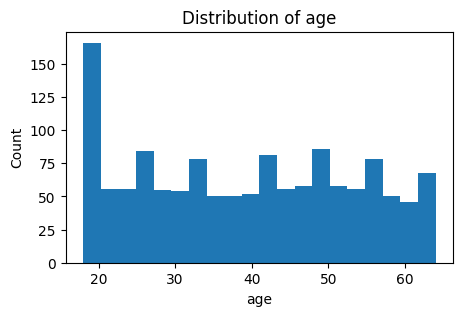

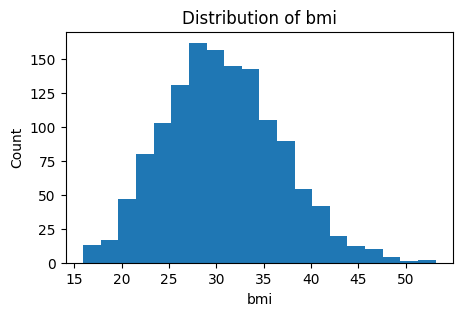

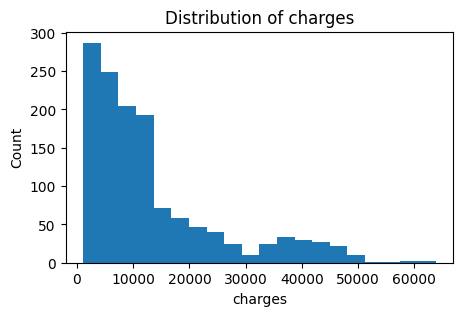

In [10]:
# Histograms for numerical columns

import matplotlib.pyplot as plt

num_cols = ['age', 'bmi', 'charges']

for col in num_cols:
    plt.figure(figsize=(5,3))
    plt.hist(insurance[col], bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [11]:
insurance['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

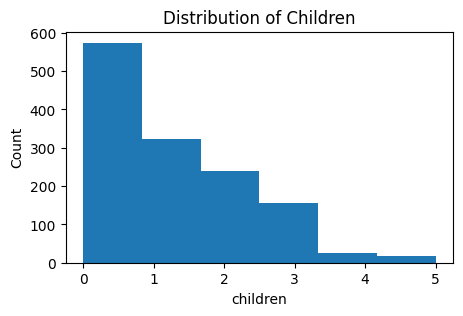

In [12]:
# Create bar chart for children distribution

plt.figure(figsize=(5,3))
plt.hist(insurance['children'], bins=6)
plt.title(f"Distribution of Children")
plt.xlabel('children')
plt.ylabel("Count")
plt.show()

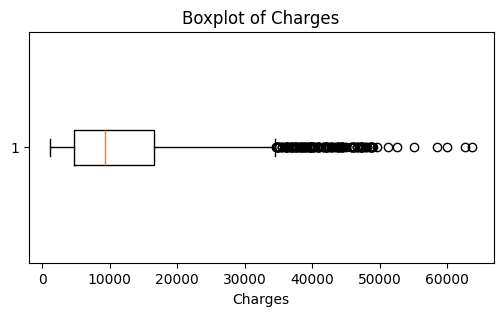

In [13]:
# Create boxplot for charges to see outliers

plt.figure(figsize=(6,3))
plt.boxplot(insurance['charges'], vert=False)
plt.title("Boxplot of Charges")
plt.xlabel("Charges")
plt.show()

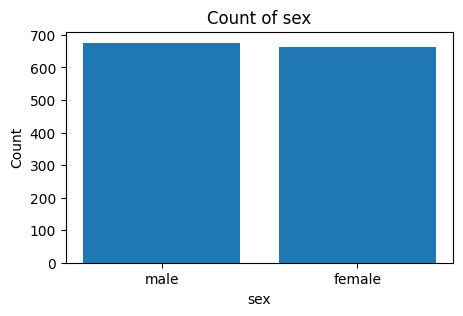

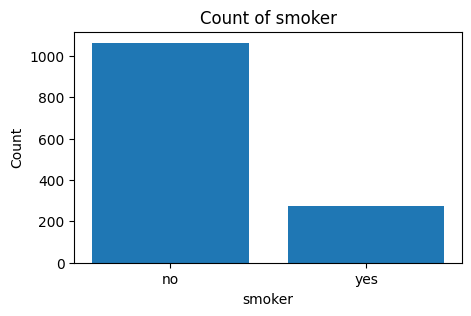

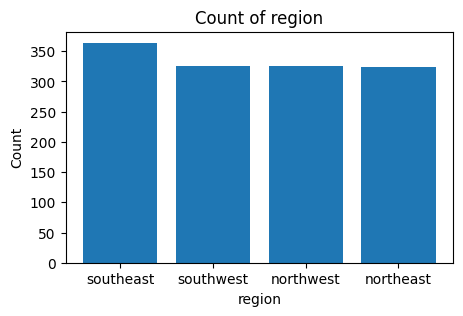

In [14]:
# Create bar charts for categorical features

cat_cols = ['sex', 'smoker', 'region']

for col in cat_cols:
    plt.figure(figsize=(5,3))
    counts = insurance[col].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

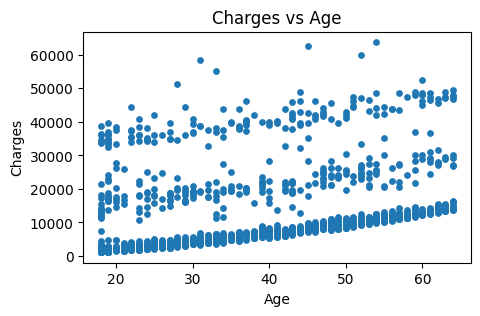

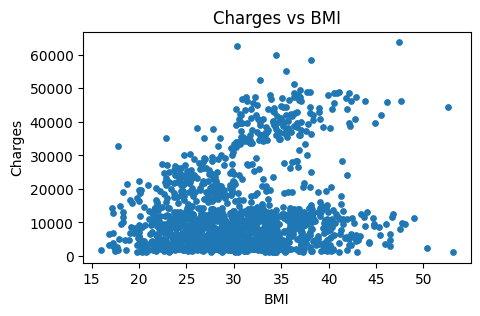

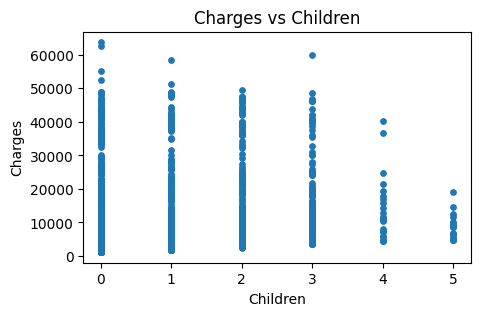

In [15]:
# Create Scatter plots (age vs charges, bmi vs charges, children vs charges)

plt.figure(figsize=(5,3))
plt.scatter(insurance['age'], insurance['charges'], s=15)
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(insurance['bmi'], insurance['charges'], s=15)
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(insurance['children'], insurance['charges'], s=15)
plt.title("Charges vs Children")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.show()

In [16]:
# Correlation matrix for numerical features with the target

target_corr = insurance[['age', 'bmi', 'children', 'charges']].corr()['charges'].drop('charges')
target_corr


age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [17]:
# Let's see the average charges by each category

print("\nMean charges by smoker:")
print(insurance.groupby('smoker')['charges'].mean())

print("\nMean charges by region:")
print(insurance.groupby('region')['charges'].mean())

print("\nMean charges by number of children:")
print(insurance.groupby('children')['charges'].mean())



Mean charges by smoker:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Mean charges by region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Mean charges by number of children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


In [18]:
# Check unrealistic BMI values
unrealistic_bmi = insurance[(insurance['bmi']<10) | (insurance['bmi']>60)]
unrealistic_bmi

,age,sex,bmi,children,smoker,region,charges


In [19]:
# Check unrealistic charges
unrealistic_charge = (insurance['charges'] <= 0).sum()
unrealistic_charge

np.int64(0)

#### Date Preprocessing and Data Engineering

In [20]:
# Remove duplicate rows
cleaned_df = insurance.drop_duplicates()

print("Shape after removing duplicates:", cleaned_df.shape)

# Quick info check
print("\nData info after cleaning:")
print(cleaned_df.info())

Shape after removing duplicates: (1337, 7)

Data info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None


#### Feature Engineering

In [21]:

cleaned_df['smoker_bin'] = cleaned_df['smoker'].map({'yes': 1, 'no':0})
cleaned_df['age_bmi']     = cleaned_df['age'] * cleaned_df['bmi']
cleaned_df['age_smoker']  = cleaned_df['age'] * cleaned_df['smoker_bin']
cleaned_df['bmi_smoker']  = cleaned_df['bmi'] * cleaned_df['smoker_bin']

cleaned_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_30464\1604960535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['smoker_bin'] = cleaned_df['smoker'].map({'yes': 1, 'no':0})
C:\Users\hp\AppData\Local\Temp\ipykernel_30464\1604960535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['age_bmi']     = cleaned_df['age'] * cleaned_df['bmi']
C:\Users\hp\AppData\Local\Temp\ipykernel_30464\1604960535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,age,sex,bmi,children,smoker,region,charges,smoker_bin,age_bmi,age_smoker,bmi_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1,530.100,19,27.9
1,18,male,33.770,1,no,southeast,1725.55230,0,607.860,0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,924.000,0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,749.265,0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,924.160,0,0.0


In [22]:
(cleaned_df['age_smoker']==0).sum()

np.int64(1063)

#### Splitting Data into X and y and Model Training

In [23]:
# --- Feature lists (numeric and categorical) ---
numeric_features = ['age', 'bmi', 'children', 'smoker_bin', 'age_bmi', 'age_smoker', 'bmi_smoker']
categorical_features = ['sex', 'region', 'smoker']

# --- Prepare X, y and split ---
X = cleaned_df[numeric_features + categorical_features]
y = cleaned_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# --- Preprocessing (pipeline) 
numeric_pipeline = Pipeline([('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# --- Build the full Pipeline with a RandomForestRegressor estimator ---
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])



In [24]:
model

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
# --- Fit model ---

model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
# --- Evaluate on test set ---
y_pred_test = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)   # always works
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluation on test set:")
print(f"MAE_test:  {mae_test}")
print(f"MSE_test:  {mse_test}")
print(f"RMSE_test: {rmse_test}")
print(f"R2_test:  {r2_test}")


Evaluation on test set:
MAE_test:  2592.8611038527974
MSE_test:  21683534.02101862
RMSE_test: 4656.558173266884
R2_test:  0.8819982669188603


In [27]:
# --- Evaluate on training set ---
y_pred_train = model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("\nTraining Set Evaluation:")
print(f"Train MAE:  {mae_train}")
print(f"Train MSE:  {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train R2:   {r2_train}")


Training Set Evaluation:
Train MAE:  1009.9869309157622
Train MSE:  3276953.9237927613
Train RMSE: 1810.2358751811216
Train R2:   0.9760657209273279


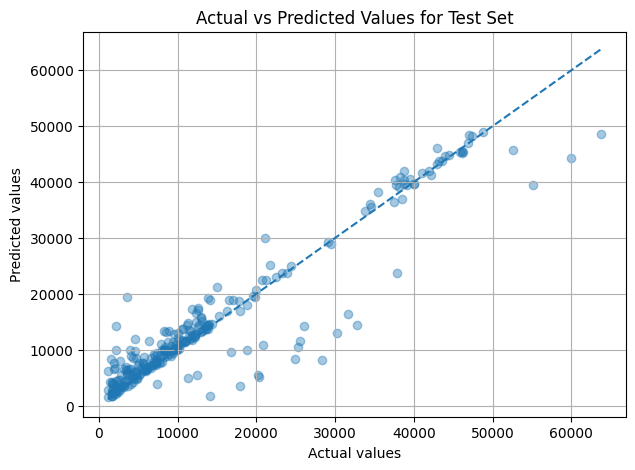

In [28]:
#Create scatter plot for actual vs predicted (test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values for Test Set")
plt.grid(True)

# Add a diagonal line for perfect predictions
min_y = min(y_test.min(), y_pred_test.min())
max_y = max(y_test.max(), y_pred_test.max())
plt.plot([min_y, max_y], [min_y, max_y], linestyle='--')

plt.show()


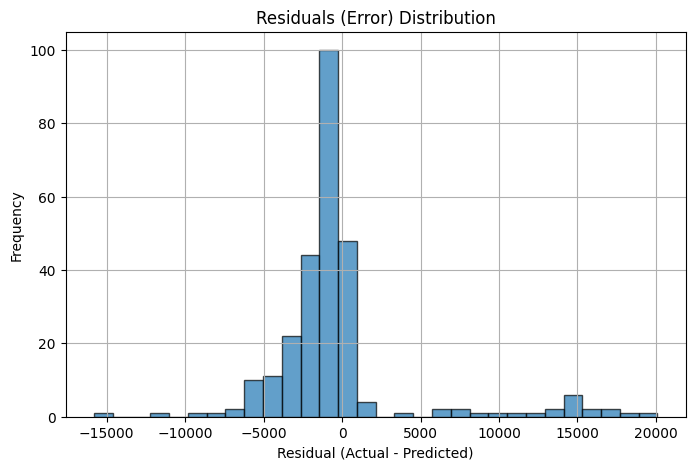

In [29]:
#Error Distribution Plot (Residual Histogram)

# Calculate residuals
residuals = y_test - y_pred_test

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)

plt.title("Residuals (Error) Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [30]:
residuals


900    -1093.489819
1064   -1541.488087
1256   -1057.745446
298    -1635.092858
237    -1514.224783
           ...     
534     -437.737533
542     -509.586057
760    -6067.158928
1284    -821.630416
1285   -4612.186967
Name: charges, Length: 268, dtype: float64

In [31]:
import pickle

with open("insurance_model.pkl", "wb") as f:
    pickle.dump(model, f)
